In [2]:
# -- Bib
import os
import sys
sys.path.append("..")

import glob
from pathlib import Path
import networkx as nx
import geopandas as gpd
import pandas as pd
import datetime as dt
import geopandas as gpd
import numpy as np
from shapely.geometry import MultiPolygon, Polygon
from dateutil.relativedelta import relativedelta
import mapclassify
from collections import defaultdict
from scipy.stats import linregress

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle

idx = pd.IndexSlice

# -- base paths
basepath = Path.home().joinpath("Documents", "data")
cnespath = basepath.joinpath("opendatasus", "cnes")
geopath = basepath.joinpath("shapefilesceqgis")
simpath = basepath.joinpath("sim", "DBF")
gmlpath = basepath.joinpath("redes_aih")
ccapath = basepath.joinpath("cca_erneson")
figpath = gmlpath.joinpath("doc_final")

# -- load geo
geodata_df = gpd.read_parquet(geopath.joinpath("ce_geodata.parquet"))
ce_geodata_df = gpd.read_parquet(geopath.joinpath("ce_regiao_saude_municipios.parquet"))

setor_df = gpd.read_file(geopath.joinpath("CE_Malha_Preliminar_2022", "CE_Malha_Preliminar_2022.shp"))
setor_df["GEOCOD6"] = setor_df["CD_MUN"].apply(lambda x: x[:6])

In [3]:
ce_border = Polygon(setor_df.geometry.unary_union.exterior)
ce_border = gpd.GeoDataFrame({"FRONTEIRA": [ 'CE' ]}, geometry=[ce_border])

fortal_border = Polygon(setor_df[setor_df["NM_MUN"]=="Fortaleza"].geometry.unary_union.exterior)
fortal_border = gpd.GeoDataFrame({"FRONTEIRA": [ 'Fortaleza' ]}, geometry=[fortal_border])

## **Pop**

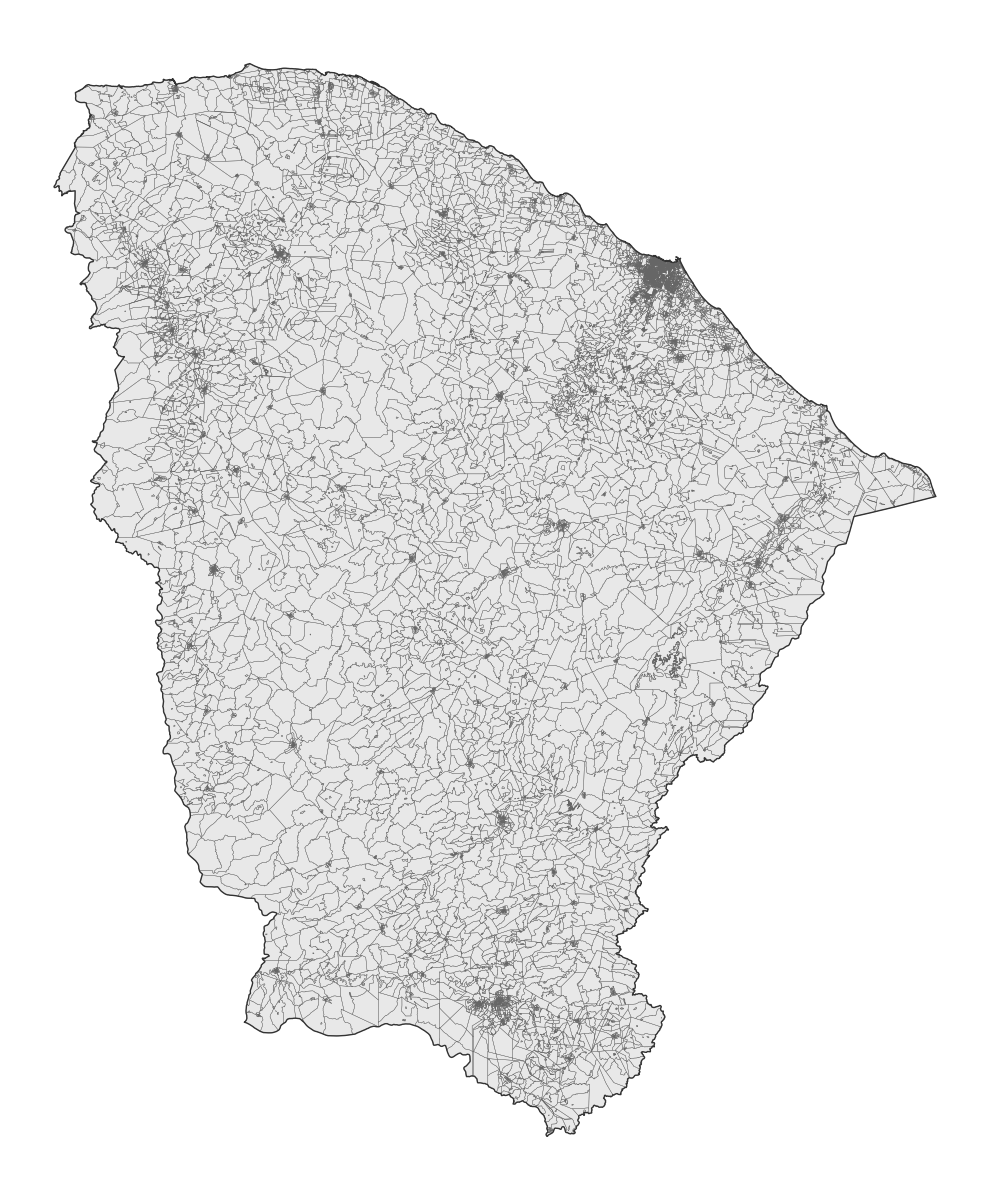

In [4]:
fig, ax = plt.subplots(1,1, figsize=(10,14))

setor_df.plot(ax=ax, color="#b3b3b3", alpha=0.3, edgecolor="#666666", antialiased=True, linewidth=0.0)
setor_df.plot(ax=ax, color="none", edgecolor="#666666", linewidth=0.25)
ce_border.plot(ax=ax, color='none', edgecolor="#333333", linewidth=1)

ax.axis('off')
fig.tight_layout()
fig.savefig(basepath.joinpath("redes_aih", "doc_final", f"setores_2022_ce.png"), dpi=200, bbox_inches='tight')

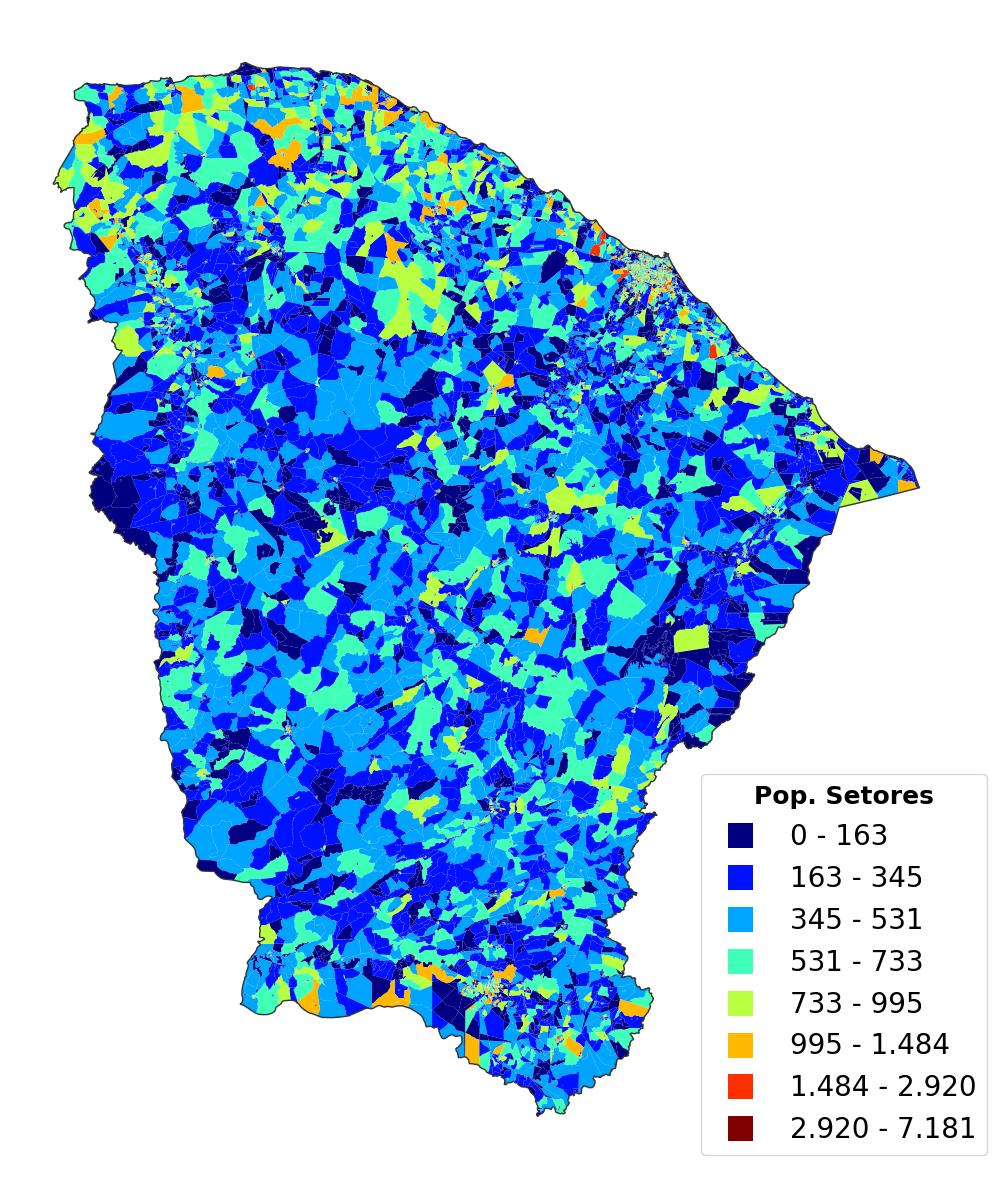

In [8]:
def transf_label(index, label, counts=None):
    label = label.replace("[", "").replace("]", "").replace("(", "")
    label = [ n.strip() for n in label.split(",") ]
    if len(label)==1:
        return label[0]
    if label[0]=='-inf' or index==0:
        label[0] = '0'
    if index==0:
        label[0] = float(label[0])
    else:
        label[0] = float(label[0])
    label[1] = float(label[1])
    if counts is None:
        return f'{label[0]:,.0f} - {label[1]:,.0f}'.replace(",",".")
    else:
        return f'{label[0]:,.0f} - {label[1]:,.0f} ({counts[index]})'.replace(",",".")

fig, ax = plt.subplots(1,1, figsize=(10,14))

setor_df.plot(ax=ax, column='v0001', edgecolor="#4d4d4d", 
              legend=True,
              scheme="NaturalBreaks",
              k=8,
              cmap='jet',
              antialiased=True,
              linewidth=0.0)
ce_border.plot(ax=ax, color='none', edgecolor="#333333", linewidth=1)

for axis in [ax]:
    axis.axis('off')
    leg = axis.get_legend()
    lines = leg.get_lines()
    for line in lines:
        cur_color = line.get_markerfacecolor() 
        line.set_marker('s')
        line.set_markersize(18)
    current_labels = [t.get_text() for t in leg.get_texts()]
    new_labels =  [ transf_label(index, label) for index, label in enumerate(current_labels) ]
    axis.legend(lines, new_labels, prop={'size': 20}, loc=4, title=f'Pop. Setores', bbox_to_anchor=(1.04,0.0), title_fontproperties={'weight': 'bold', 'size': 18})

ax.axis('off')
fig.tight_layout()
fig.savefig(basepath.joinpath("redes_aih", "doc_final", f"setores_pop_2022_ce.png"), dpi=200, bbox_inches='tight')

c:\Users\Higor Monteiro\anaconda3\envs\mywork\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


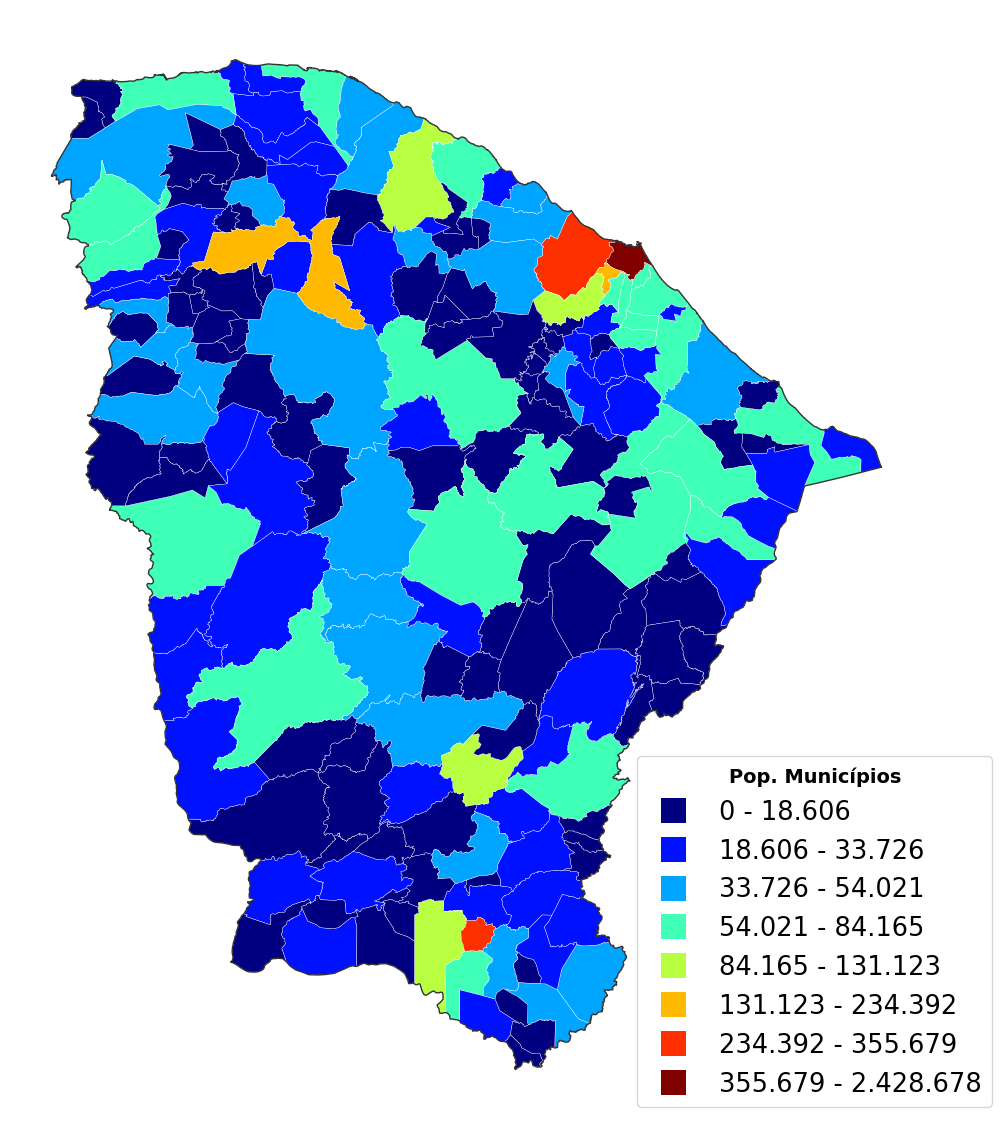

In [22]:
def transf_label(index, label, counts=None):
    label = label.replace("[", "").replace("]", "").replace("(", "")
    label = [ n.strip() for n in label.split(",") ]
    if len(label)==1:
        return label[0]
    if label[0]=='-inf' or index==0:
        label[0] = '0'
    if index==0:
        label[0] = float(label[0])
    else:
        label[0] = float(label[0])
    label[1] = float(label[1])
    if counts is None:
        return f'{label[0]:,.0f} - {label[1]:,.0f}'.replace(",",".")
    else:
        return f'{label[0]:,.0f} - {label[1]:,.0f} ({counts[index]})'.replace(",",".")

fig, ax = plt.subplots(1,1, figsize=(10,14))

ce_geodata_df.plot(ax=ax, column='2022', edgecolor="#ffffff", 
              linewidth=0.25,
              legend=True,
              scheme="NaturalBreaks",
              k=8,
              cmap='jet',
              #antialiased=False
              )
#setor_df.plot(ax=ax, color='none', edgecolor="#4d4d4d", linewidth=0.1)
ce_border.plot(ax=ax, color='none', edgecolor="#333333", linewidth=1)

for axis in [ax]:
    axis.axis('off')
    leg = axis.get_legend()
    lines = leg.get_lines()
    for line in lines:
        cur_color = line.get_markerfacecolor() 
        line.set_marker('s')
        line.set_markersize(18)
    current_labels = [t.get_text() for t in leg.get_texts()]
    new_labels =  [ transf_label(index, label) for index, label in enumerate(current_labels) ]
    axis.legend(lines, new_labels, prop={'size': 18.5}, loc=4, title=f'Pop. Municípios', bbox_to_anchor=(1.09,0.0), title_fontproperties={'weight': 'bold', 'size': 14})

ax.axis('off')
fig.tight_layout()
fig.savefig(basepath.joinpath("redes_aih", "doc_final", f"setores_municipios_pop_2022_ce.png"), dpi=200, bbox_inches='tight')

In [23]:
cca_df = pd.read_parquet(ccapath.joinpath('results',f'clusters_ce_l5_d100.parquet')).reset_index().rename({'index': 'CLUSTER'}, axis=1)

setores_to_info = dict()
clusters = cca_df.CLUSTER.tolist()
for index, codes in enumerate(cca_df.codes.tolist()):
    for code in codes:
        setores_to_info.update({code: clusters[index]})
setor_df["CLUSTER"] = setor_df["CD_SETOR"].map(setores_to_info)
setores1 = setor_df.merge(cca_df[["CLUSTER", "population", "area"]], how="left")

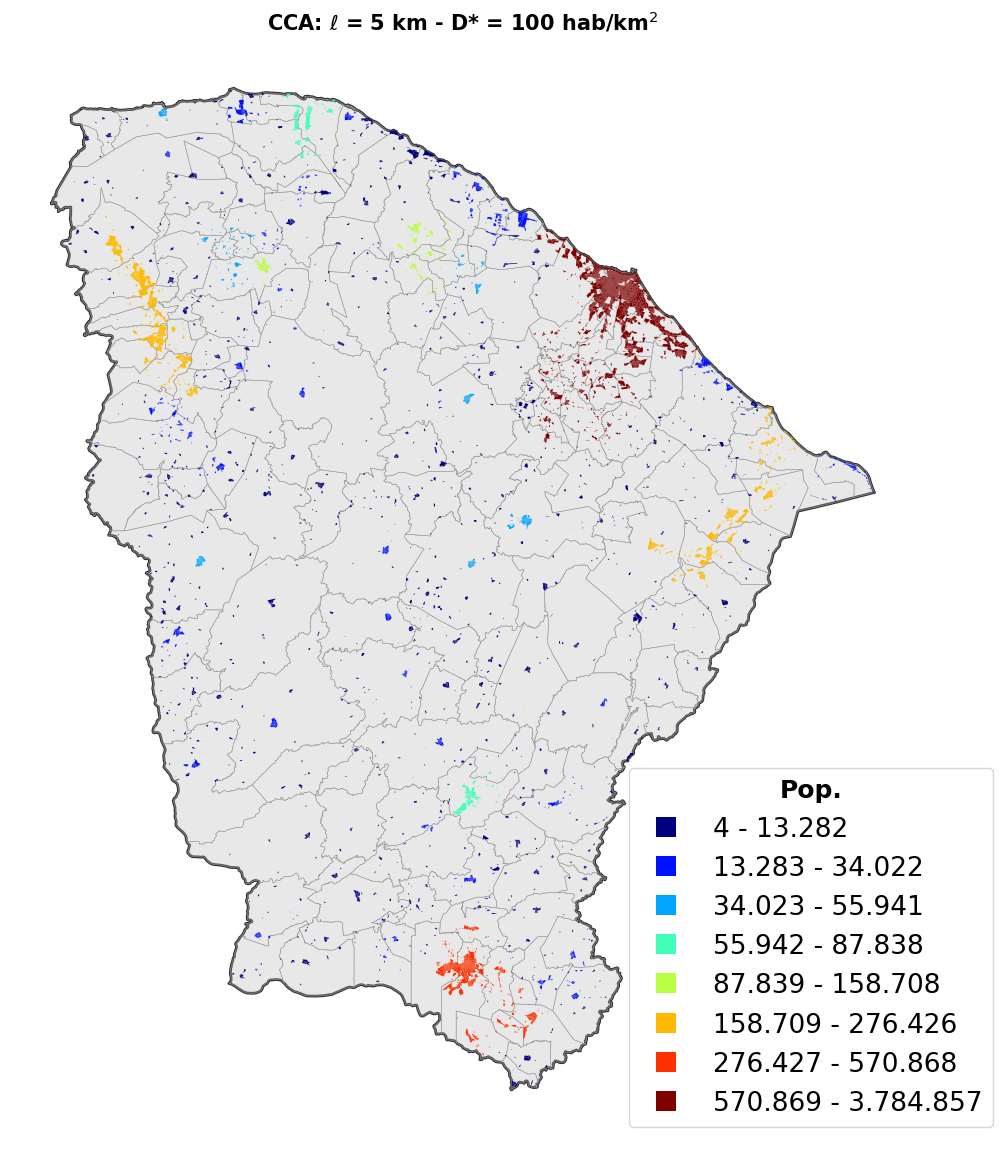

In [42]:
def transf_label(index, label):
    label = label.replace("[", "").replace("]", "").replace("(", "")
    label = [ n.strip() for n in label.split(",") ]
    if len(label)==1:
        return label[0]
    if index==0:
        label[0] = int(label[0])
    else:
        label[0] = int(label[0])+1
    label[1] = int(label[1])
    return f'{label[0]:,} - {label[1]:,}'.replace(",",".")

# -- geometry ceará
fig_mapa, (ax) = plt.subplots(1, figsize=(10,14))

setores1[pd.notna(setores1["CLUSTER"])].plot(ax=ax, zorder=3, column=f"population", edgecolor="none",
             legend=True,
             scheme="NaturalBreaks",
             k=8,
             cmap='jet',
             antialiased=True,
             linewidth=0,
             legend_kwds={
                 'loc': 4,
                 'prop': {'size':18},
                 'markerscale': 1.6,
                 "fmt": "{:.0f}",
                 "interval": True
             },
             missing_kwds={
                 "color": "#b3b3b3",
                 "edgecolor": "none",
                 "hatch": "",
                 "label": '',
                 'alpha': 0.3
             })
ce_geodata_df.plot(ax=ax, zorder=2, color='#b3b3b3', alpha=0.3, edgecolor="none", linewidth=0.2)
ce_geodata_df.plot(ax=ax, zorder=2, color='none', alpha=1.0, edgecolor="#999999", linewidth=0.35)
ce_border.plot(ax=ax, color='none', edgecolor="#333333", linewidth=2)

ax.axis('off')

for axis in [ax]:
    axis.axis('off')
    leg = axis.get_legend()
    lines = leg.get_lines()
    for line in lines:
        cur_color = line.get_markerfacecolor() 
        line.set_marker('s')
        line.set_markersize(14)
    current_labels = [t.get_text() for t in leg.get_texts()]
    new_labels =  [ transf_label(index, label) for index, label in enumerate(current_labels) ]
    axis.legend(lines, new_labels, prop={'size': 19}, loc=4, title=f'Pop.', bbox_to_anchor=(1.1,0.0), title_fontproperties={'weight': 'bold', 'size': 18})

macro_df = geodata_df.drop_duplicates("MACRO_ID", keep='first')[["MACRO_ID", "MACRO_COLOR", "MACRO_NOME", "geometry_macro"]]
macro_df = macro_df.set_geometry("geometry_macro")
#macro_df.plot(ax=AX1, color="none", edgecolor="#1a1a1a", linewidth=1.4)
#new_macro_geometry.plot(ax=AX1, color="none", zorder=3, edgecolor="#1a1a1a", linewidth=1.4)
ax.set_title(fr'CCA: $\ell$ = 5 km - D* = 100 hab'+fr'/km$^2$', fontsize=15, weight='bold')
fig_mapa.tight_layout()
#fig_mapa.savefig(basepath.joinpath("redes_aih", "doc_final", f"cca_pop_l5_D100_original.png"), dpi=250, bbox_inches='tight')
fig_mapa.savefig(basepath.joinpath("redes_aih", "doc_final", f"cca_pop_2022_ce.png"), dpi=200, bbox_inches='tight')

In [27]:
setores1

CD_SETOR   AREA_KM2 CD_REGIAO NM_REGIAO CD_UF  NM_UF   CD_MUN  \
0      230010105000001P   0.373958         2  Nordeste    23  Ceará  2300101   
1      230010105000002P   0.076252         2  Nordeste    23  Ceará  2300101   
2      230010105000003P   0.064359         2  Nordeste    23  Ceará  2300101   
3      230010105000007P  18.681270         2  Nordeste    23  Ceará  2300101   
4      230010105000009P   9.114321         2  Nordeste    23  Ceará  2300101   
...                 ...        ...       ...       ...   ...    ...      ...   
19805  231410225000014P   0.150549         2  Nordeste    23  Ceará  2314102   
19806  231410225000015P  19.674079         2  Nordeste    23  Ceará  2314102   
19807  231410225000016P   1.809005         2  Nordeste    23  Ceará  2314102   
19808  231410225000017P   0.377628         2  Nordeste    23  Ceará  2314102   
19809  231410225000018P   0.537204         2  Nordeste    23  Ceará  2314102   

                NM_MUN    CD_DIST     NM_DIST  ... v0003 v0004     v0005  \
0              Abaiara  230010105     Abaiara  ...   350     0  2.811644   
1              Abaiara  230010105     Abaiara  ...   141     0  2.801887   
2              Abaiara  230010105     Abaiara  ...   166     0  2.831081   
3              Abaiara  230010105     Abaiara  ...   132     0  2.850575   
4              Abaiara  230010105     Abaiara  ...   222     0  3.244186   
...                ...        ...         ...  ...   ...   ...       ...   
19805  Viçosa do Ceará  231410225  Quatiguaba  ...    68     0  2.888889   
19806  Viçosa do Ceará  231410225  Quatiguaba  ...   215     0  3.605128   
19807  Viçosa do Ceará  231410225  Quatiguaba  ...   151     0  3.213740   
19808  Viçosa do Ceará  231410225  Quatiguaba  ...   104     0  3.412500   
19809  Viçosa do Ceará  231410225  Quatiguaba  ...   193     0  3.587500   

          v0006 v0007                                           geometry  \
0      0.000000   292  POLYGON ((-39.04529 -7.36120, -39.04674 -7.360...   
1      0.000000   106  POLYGON ((-39.05213 -7.36096, -39.05164 -7.361...   
2      0.000000   148  POLYGON ((-39.04683 -7.36087, -39.04681 -7.361...   
3      0.000000    87  POLYGON ((-39.06577 -7.35072, -39.06580 -7.353...   
4      0.000000   172  POLYGON ((-39.06472 -7.32607, -39.06466 -7.327...   
...         ...   ...                                                ...   
19805  0.000000    63  POLYGON ((-41.06854 -3.67228, -41.06859 -3.672...   
19806  0.000000   195  POLYGON ((-41.11254 -3.65781, -41.11147 -3.676...   
19807  0.763359   131  POLYGON ((-41.07512 -3.62503, -41.07483 -3.626...   
19808  0.000000    80  POLYGON ((-41.09306 -3.65901, -41.09311 -3.659...   
19809  0.000000   160  POLYGON ((-41.09105 -3.65199, -41.08899 -3.657...   

      GEOCOD6 CLUSTER population        area  
0      230010     0.0   570868.0  352.082367  
1      230010     0.0   570868.0  352.082367  
2      230010     0.0   570868.0  352.082367  
3      230010     NaN        NaN         NaN  
4      230010     NaN        NaN         NaN  
...       ...     ...        ...         ...  
19805  231410   203.0   258057.0  410.546343  
19806  231410     NaN        NaN         NaN  
19807  231410   203.0   258057.0  410.546343  
19808  231410   203.0   258057.0  410.546343  
19809  231410   203.0   258057.0  410.546343  

[19810 rows x 34 columns]

## **Leitos**

In [44]:
cca_df = pd.read_parquet(ccapath.joinpath('results',f'clusters_ce_l5_d100.parquet')).reset_index().rename({'index': 'CLUSTER'}, axis=1)
leitos_df = pd.read_parquet(os.path.join(cnespath, "cnes_leitos_timeserie_0801_2312.parquet"))
geodata_df_cca = geodata_df.copy()

setores_to_info = dict()
clusters = cca_df.CLUSTER.tolist()
for index, codes in enumerate(cca_df.codes.tolist()):
    for code in codes:
        setores_to_info.update({code: clusters[index]})
setor_df["CLUSTER"] = setor_df["CD_SETOR"].map(setores_to_info)
#setores1 = setor_df.merge(cca_df[["CLUSTER", "population", "area"]], how="left")

valid_cnes_df = pd.read_parquet(os.path.join(gmlpath, "dados_for_plot", "cnes_com_aih_1801_2306.parquet"))
valid_cnes_df["geometry"] = gpd.points_from_xy(valid_cnes_df.longitude, valid_cnes_df.latitude)
valid_cnes_df = gpd.GeoDataFrame(valid_cnes_df, geometry='geometry')

# -- find the census tract of each health unit
setor = setor_df.copy()
cnes_to_sector = dict()
for index in range(valid_cnes_df.shape[0]):
    current_cnes = valid_cnes_df["CNES"].iloc[index]
    current_point = valid_cnes_df.geometry.iloc[index]

    cod_setores = setor[setor.geometry.contains(current_point)]["CD_SETOR"].tolist()
    cnes_to_sector.update({current_cnes: cod_setores[0]})

valid_cnes_df["CD_SETOR"] = valid_cnes_df["CNES"].map(cnes_to_sector)
valid_cnes_df["NUMLEITOS"] = valid_cnes_df["CNES"].apply(lambda x: leitos_df.loc[:, idx[x, "NUMLEITOS_PRINC"]].tolist()[-1])

In [45]:
setor1 = setor[["CD_SETOR", "v0001", "AREA_KM2", "CLUSTER"]].copy()
module_pop = setor.groupby(f"CLUSTER")[["v0001", "AREA_KM2"]].sum().reset_index()
module_pop_dict = dict(zip(module_pop[f"CLUSTER"], module_pop["v0001"]))
module_area_dict = dict(zip(module_pop[f"CLUSTER"], module_pop["AREA_KM2"]))
setor1["CCA_POP"] = setor1[f"CLUSTER"].map(module_pop_dict)
setor1["CCA_AREA"] = setor1[f"CLUSTER"].map(module_area_dict)

valid_cnes_temp = valid_cnes_df.copy()
leitos_per_cluster = valid_cnes_temp.merge(setor1[["CD_SETOR", f"CLUSTER"]]).groupby(f"CLUSTER")["NUMLEITOS"].sum().reset_index()
setor1 = setor1.merge(leitos_per_cluster, on=f"CLUSTER", how="left")
setor1 = setor1[pd.notna(setor1["CLUSTER"])].drop_duplicates(subset=["CLUSTER"])
setor1 = setor1[pd.notna(setor1["NUMLEITOS"])]

In [46]:
temp_ = valid_cnes_df.groupby("CD_SETOR")["NUMLEITOS"].sum().reset_index()
setor_df1 = setor_df.merge(temp_, how='left')
setor_df1 = setor_df1.merge(ce_geodata_df[["MACRO_ID", "REGIAO_SAUDE_8", "GEOCOD7"]], left_on="CD_MUN", right_on="GEOCOD7", how="left")
setor_df1.head(2)

CD_SETOR  AREA_KM2 CD_REGIAO NM_REGIAO CD_UF  NM_UF   CD_MUN  \
0  230010105000001P  0.373958         2  Nordeste    23  Ceará  2300101   
1  230010105000002P  0.076252         2  Nordeste    23  Ceará  2300101   

    NM_MUN    CD_DIST  NM_DIST  ...     v0005 v0006 v0007  \
0  Abaiara  230010105  Abaiara  ...  2.811644   0.0   292   
1  Abaiara  230010105  Abaiara  ...  2.801887   0.0   106   

                                            geometry GEOCOD6 CLUSTER  \
0  POLYGON ((-39.04529 -7.36120, -39.04674 -7.360...  230010     0.0   
1  POLYGON ((-39.05213 -7.36096, -39.05164 -7.361...  230010     0.0   

  NUMLEITOS MACRO_ID REGIAO_SAUDE_8  GEOCOD7  
0       NaN        5              3  2300101  
1       NaN        5              3  2300101  

[2 rows x 36 columns]

c:\Users\Higor Monteiro\anaconda3\envs\mywork\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


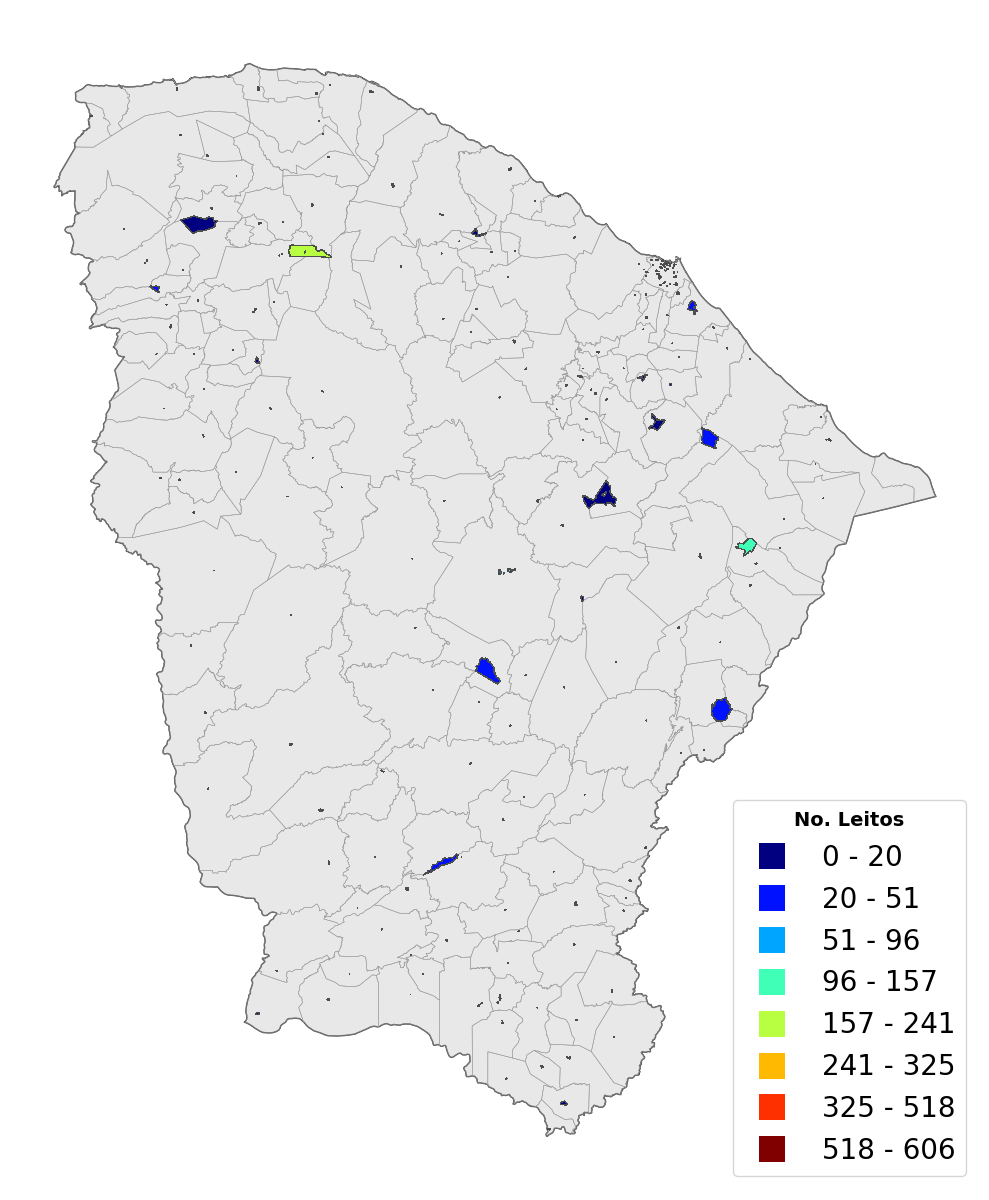

In [54]:
def transf_label(index, label, counts=None):
    label = label.replace("[", "").replace("]", "").replace("(", "")
    label = [ n.strip() for n in label.split(",") ]
    if len(label)==1:
        return label[0]
    if label[0]=='-inf' or index==0:
        label[0] = '0'
    if index==0:
        label[0] = float(label[0])
    else:
        label[0] = float(label[0])
    label[1] = float(label[1])
    if counts is None:
        return f'{label[0]:,.0f} - {label[1]:,.0f}'.replace(",",".")
    else:
        return f'{label[0]:,.0f} - {label[1]:,.0f} ({counts[index]})'.replace(",",".")

fig, ax = plt.subplots(1,1, figsize=(10,14))

setor_df1[pd.notna(setor_df1["NUMLEITOS"])].plot(ax=ax, zorder=3, column='NUMLEITOS', edgecolor="#4d4d4d", 
              legend=True,
              scheme="NaturalBreaks",
              k=8,
              cmap='jet',
              antialiased=False,
              linewidth=0.2,
              missing_kwds={
                 "color": "#b3b3b3",
                 "edgecolor": "none",
                 "hatch": "",
                 "label": '',
                 'alpha': 0.3
             })
ce_geodata_df.plot(ax=ax, zorder=2, color='#b3b3b3', alpha=0.3, edgecolor="none", linewidth=0.2)
ce_geodata_df.plot(ax=ax, zorder=2, color='none', alpha=1.0, edgecolor="#999999", linewidth=0.35)
ce_border.plot(ax=ax, color='none', edgecolor="#333333", linewidth=1)

for axis in [ax]:
    axis.axis('off')
    leg = axis.get_legend()
    lines = leg.get_lines()
    for line in lines:
        cur_color = line.get_markerfacecolor() 
        line.set_marker('s')
        line.set_markersize(19)
    current_labels = [t.get_text() for t in leg.get_texts()]
    new_labels =  [ transf_label(index, label) for index, label in enumerate(current_labels) ]
    axis.legend(lines, new_labels, prop={'size': 20}, loc=4, title=f'No. Leitos', bbox_to_anchor=(1.0,0.0), title_fontproperties={'weight': 'bold', 'size': 14})

ax.axis('off')
fig.tight_layout()
fig.savefig(basepath.joinpath("redes_aih", "doc_final", f"leitos_por_setores_ce_2022.png"), dpi=200, bbox_inches='tight')

In [49]:
setor_df1


CD_SETOR   AREA_KM2 CD_REGIAO NM_REGIAO CD_UF  NM_UF   CD_MUN  \
0      230010105000001P   0.373958         2  Nordeste    23  Ceará  2300101   
1      230010105000002P   0.076252         2  Nordeste    23  Ceará  2300101   
2      230010105000003P   0.064359         2  Nordeste    23  Ceará  2300101   
3      230010105000007P  18.681270         2  Nordeste    23  Ceará  2300101   
4      230010105000009P   9.114321         2  Nordeste    23  Ceará  2300101   
...                 ...        ...       ...       ...   ...    ...      ...   
19805  231410225000014P   0.150549         2  Nordeste    23  Ceará  2314102   
19806  231410225000015P  19.674079         2  Nordeste    23  Ceará  2314102   
19807  231410225000016P   1.809005         2  Nordeste    23  Ceará  2314102   
19808  231410225000017P   0.377628         2  Nordeste    23  Ceará  2314102   
19809  231410225000018P   0.537204         2  Nordeste    23  Ceará  2314102   

                NM_MUN    CD_DIST     NM_DIST  ...     v0005     v0006 v0007  \
0              Abaiara  230010105     Abaiara  ...  2.811644  0.000000   292   
1              Abaiara  230010105     Abaiara  ...  2.801887  0.000000   106   
2              Abaiara  230010105     Abaiara  ...  2.831081  0.000000   148   
3              Abaiara  230010105     Abaiara  ...  2.850575  0.000000    87   
4              Abaiara  230010105     Abaiara  ...  3.244186  0.000000   172   
...                ...        ...         ...  ...       ...       ...   ...   
19805  Viçosa do Ceará  231410225  Quatiguaba  ...  2.888889  0.000000    63   
19806  Viçosa do Ceará  231410225  Quatiguaba  ...  3.605128  0.000000   195   
19807  Viçosa do Ceará  231410225  Quatiguaba  ...  3.213740  0.763359   131   
19808  Viçosa do Ceará  231410225  Quatiguaba  ...  3.412500  0.000000    80   
19809  Viçosa do Ceará  231410225  Quatiguaba  ...  3.587500  0.000000   160   

                                                geometry GEOCOD6 CLUSTER  \
0      POLYGON ((-39.04529 -7.36120, -39.04674 -7.360...  230010     0.0   
1      POLYGON ((-39.05213 -7.36096, -39.05164 -7.361...  230010     0.0   
2      POLYGON ((-39.04683 -7.36087, -39.04681 -7.361...  230010     0.0   
3      POLYGON ((-39.06577 -7.35072, -39.06580 -7.353...  230010     NaN   
4      POLYGON ((-39.06472 -7.32607, -39.06466 -7.327...  230010     NaN   
...                                                  ...     ...     ...   
19805  POLYGON ((-41.06854 -3.67228, -41.06859 -3.672...  231410   203.0   
19806  POLYGON ((-41.11254 -3.65781, -41.11147 -3.676...  231410     NaN   
19807  POLYGON ((-41.07512 -3.62503, -41.07483 -3.626...  231410   203.0   
19808  POLYGON ((-41.09306 -3.65901, -41.09311 -3.659...  231410   203.0   
19809  POLYGON ((-41.09105 -3.65199, -41.08899 -3.657...  231410   203.0   

      NUMLEITOS MACRO_ID REGIAO_SAUDE_8  GEOCOD7  
0           NaN        5              3  2300101  
1           NaN        5              3  2300101  
2           NaN        5              3  2300101  
3           NaN        5              3  2300101  
4           NaN        5              3  2300101  
...         ...      ...            ...      ...  
19805       NaN        4              8  2314102  
19806       NaN        4              8  2314102  
19807       NaN        4              8  2314102  
19808       NaN        4              8  2314102  
19809       NaN        4              8  2314102  

[19810 rows x 36 columns]

c:\Users\Higor Monteiro\anaconda3\envs\mywork\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


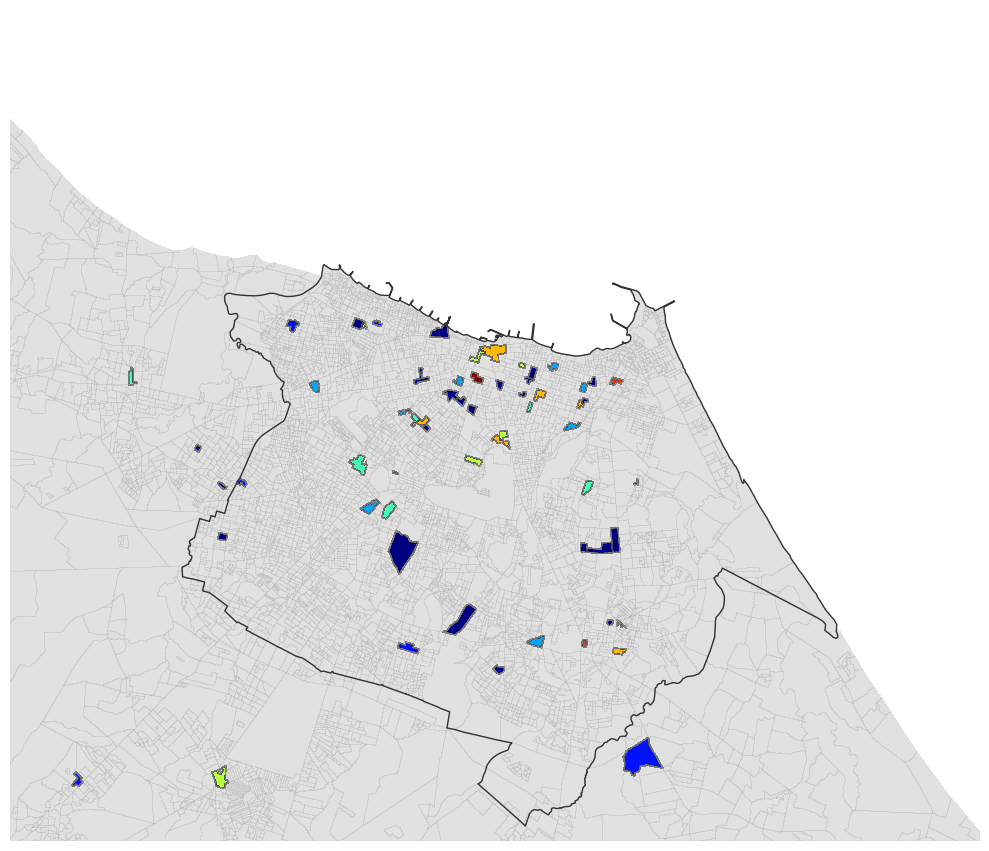

In [56]:
muni_lista = ["Fortaleza", "Caucaia", "Eusébio", "Maracanaú", "Maranguape", "Itaitinga", "Pacatuba", "Aquiraz"]

def transf_label(index, label, counts=None):
    label = label.replace("[", "").replace("]", "").replace("(", "")
    label = [ n.strip() for n in label.split(",") ]
    if len(label)==1:
        return label[0]
    if label[0]=='-inf' or index==0:
        label[0] = '0'
    if index==0:
        label[0] = float(label[0])
    else:
        label[0] = float(label[0])
    label[1] = float(label[1])
    if counts is None:
        return f'{label[0]:,.0f} - {label[1]:,.0f}'.replace(",",".")
    else:
        return f'{label[0]:,.0f} - {label[1]:,.0f} ({counts[index]})'.replace(",",".")

fig, ax = plt.subplots(1,1, figsize=(10,14))
setor_df1[setor_df1["NM_MUN"].isin(muni_lista)].plot(ax=ax, column='NUMLEITOS', edgecolor="#4d4d4d", 
              legend=False,
              scheme="NaturalBreaks",
              k=8,
              cmap='jet',
              antialiased=False,
              linewidth=0.5,
              missing_kwds={
                 "color": "#b3b3b3",
                 "edgecolor": "none",
                 "hatch": "",
                 "label": '',
                 'alpha': 0.4
             })
fortal_border.plot(ax=ax, color='none', edgecolor="#333333", linewidth=1)
#ce_border.plot(ax=ax, color='none', edgecolor="#333333", linewidth=1)

#for axis in [ax]:
#    #axis.axis('off')
#    leg = axis.get_legend()
#    lines = leg.get_lines()
#    for line in lines:
#        cur_color = line.get_markerfacecolor() 
#        line.set_marker('s')
#        line.set_markersize(14)
#    current_labels = [t.get_text() for t in leg.get_texts()]
#    new_labels =  [ transf_label(index, label) for index, label in enumerate(current_labels) ]
#    axis.legend(lines, new_labels, prop={'size': 15}, loc=4, title=f'No', bbox_to_anchor=(1.04,0.0), title_fontproperties={'weight': 'bold', 'size': 14})

#ax.axis('off')
bbox = [-38.7, -3.9, -38.4, -3.6]
ax.axis('off')
ax.set_xlim([-38.7, -38.35])
ax.set_ylim([-3.9, -3.6])

fig.tight_layout()
fig.savefig(basepath.joinpath("redes_aih", "doc_final", f"leitos_por_setores_ce_zoom_2022.png"), dpi=200, bbox_inches='tight')


In [57]:
setor_df2 = setor_df1.copy()
setor_df2["NUMLEITOS"] = setor_df2["NUMLEITOS"].fillna(0)
temp_ = setor_df2.groupby("CD_MUN")["NUMLEITOS"].sum().reset_index()

ce_geodata_df1 = ce_geodata_df.merge(temp_, left_on="GEOCOD7", right_on="CD_MUN", how="left")

c:\Users\Higor Monteiro\anaconda3\envs\mywork\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


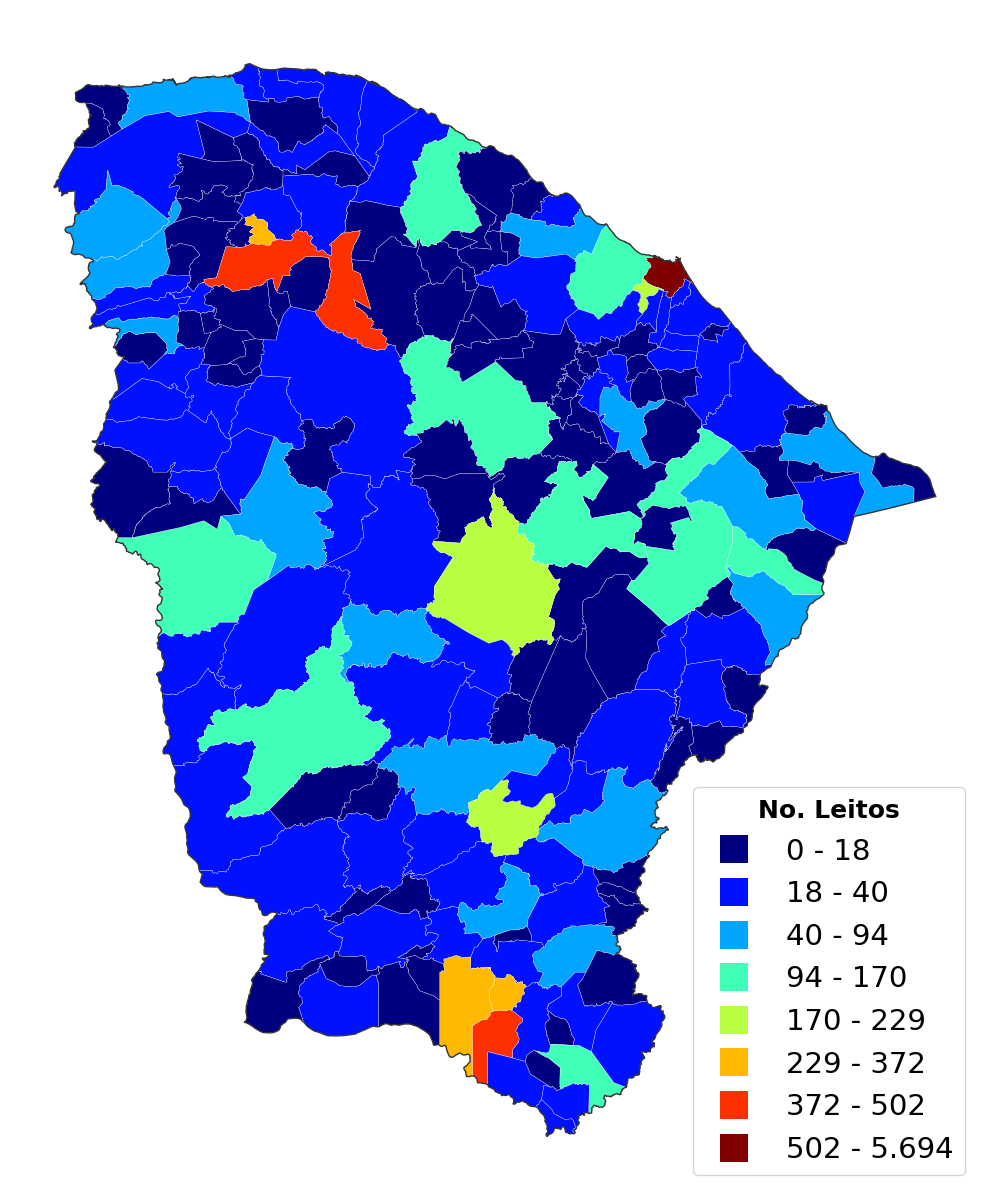

In [64]:
def transf_label(index, label, counts=None):
    label = label.replace("[", "").replace("]", "").replace("(", "")
    label = [ n.strip() for n in label.split(",") ]
    if len(label)==1:
        return label[0]
    if label[0]=='-inf' or index==0:
        label[0] = '0'
    if index==0:
        label[0] = float(label[0])
    else:
        label[0] = float(label[0])
    label[1] = float(label[1])
    if counts is None:
        return f'{label[0]:,.0f} - {label[1]:,.0f}'.replace(",",".")
    else:
        return f'{label[0]:,.0f} - {label[1]:,.0f} ({counts[index]})'.replace(",",".")

fig, ax = plt.subplots(1,1, figsize=(10,14))

ce_geodata_df1.plot(ax=ax, column='NUMLEITOS', edgecolor="#ffffff", 
              legend=True,
              scheme="NaturalBreaks",
              k=8,
              cmap='jet',
              antialiased=True,
              linewidth=0.2)
#setor_df.plot(ax=ax, color='none', edgecolor="#4d4d4d", linewidth=0.1)
ce_border.plot(ax=ax, color='none', edgecolor="#333333", linewidth=1)

for axis in [ax]:
    axis.axis('off')
    leg = axis.get_legend()
    lines = leg.get_lines()
    for line in lines:
        cur_color = line.get_markerfacecolor() 
        line.set_marker('s')
        line.set_markersize(20)
    current_labels = [t.get_text() for t in leg.get_texts()]
    new_labels =  [ transf_label(index, label) for index, label in enumerate(current_labels) ]
    axis.legend(lines, new_labels, prop={'size': 21}, loc=4, title=f'No. Leitos', bbox_to_anchor=(1.0,0.0), title_fontproperties={'weight': 'bold', 'size': 18})

ax.axis('off')
fig.tight_layout()
fig.savefig(basepath.joinpath("redes_aih", "doc_final", f"leitos_por_municipio_ce_2022.png"), dpi=200, bbox_inches='tight')

In [65]:
cca_df = pd.read_parquet(ccapath.joinpath('results',f'clusters_ce_l5_d100.parquet')).reset_index().rename({'index': 'CLUSTER'}, axis=1)
leitos_df = pd.read_parquet(os.path.join(cnespath, "cnes_leitos_timeserie_0801_2312.parquet"))
geodata_df_cca = geodata_df.copy()

setores_to_info = dict()
clusters = cca_df.CLUSTER.tolist()
for index, codes in enumerate(cca_df.codes.tolist()):
    for code in codes:
        setores_to_info.update({code: clusters[index]})
setor_df["CLUSTER"] = setor_df["CD_SETOR"].map(setores_to_info)
#setores1 = setor_df.merge(cca_df[["CLUSTER", "population", "area"]], how="left")

valid_cnes_df = pd.read_parquet(os.path.join(gmlpath, "dados_for_plot", "cnes_com_aih_1801_2306.parquet"))
valid_cnes_df["geometry"] = gpd.points_from_xy(valid_cnes_df.longitude, valid_cnes_df.latitude)
valid_cnes_df = gpd.GeoDataFrame(valid_cnes_df, geometry='geometry')

# -- find the census tract of each health unit
setor = setor_df.copy()
cnes_to_sector = dict()
for index in range(valid_cnes_df.shape[0]):
    current_cnes = valid_cnes_df["CNES"].iloc[index]
    current_polygon = valid_cnes_df.geometry.iloc[index]

    cod_setores = setor[setor.geometry.contains(current_polygon)]["CD_SETOR"].tolist()
    cnes_to_sector.update({current_cnes: cod_setores[0]})

valid_cnes_df["CD_SETOR"] = valid_cnes_df["CNES"].map(cnes_to_sector)
valid_cnes_df["NUMLEITOS"] = valid_cnes_df["CNES"].apply(lambda x: leitos_df.loc[:, idx[x, "NUMLEITOS_PRINC"]].tolist()[-1])

In [66]:
setor1 = setor[["CD_SETOR", "v0001", "AREA_KM2", "CLUSTER"]].copy()
module_pop = setor.groupby(f"CLUSTER")[["v0001", "AREA_KM2"]].sum().reset_index()
module_pop_dict = dict(zip(module_pop[f"CLUSTER"], module_pop["v0001"]))
module_area_dict = dict(zip(module_pop[f"CLUSTER"], module_pop["AREA_KM2"]))
setor1["CCA_POP"] = setor1[f"CLUSTER"].map(module_pop_dict)
setor1["CCA_AREA"] = setor1[f"CLUSTER"].map(module_area_dict)

valid_cnes_temp = valid_cnes_df.copy()
leitos_per_cluster = valid_cnes_temp.merge(setor1[["CD_SETOR", f"CLUSTER"]]).groupby(f"CLUSTER")["NUMLEITOS"].sum().reset_index()
setor1 = setor1.merge(leitos_per_cluster, on=f"CLUSTER", how="left")
setor1 = setor1[pd.notna(setor1["CLUSTER"])].drop_duplicates(subset=["CLUSTER"])
setor1 = setor1[pd.notna(setor1["NUMLEITOS"])]

setor_leitos_df = setor_df.merge(setor1[["CLUSTER", "NUMLEITOS"]], how="left")[["CD_SETOR", "NUMLEITOS", "geometry"]]

In [69]:
setor_leitos_df

CD_SETOR  NUMLEITOS  \
0      230010105000001P     1426.0   
1      230010105000002P     1426.0   
2      230010105000003P     1426.0   
3      230010105000007P        NaN   
4      230010105000009P        NaN   
...                 ...        ...   
19805  231410225000014P      298.0   
19806  231410225000015P        NaN   
19807  231410225000016P      298.0   
19808  231410225000017P      298.0   
19809  231410225000018P      298.0   

                                                geometry  
0      POLYGON ((-39.04529 -7.36120, -39.04674 -7.360...  
1      POLYGON ((-39.05213 -7.36096, -39.05164 -7.361...  
2      POLYGON ((-39.04683 -7.36087, -39.04681 -7.361...  
3      POLYGON ((-39.06577 -7.35072, -39.06580 -7.353...  
4      POLYGON ((-39.06472 -7.32607, -39.06466 -7.327...  
...                                                  ...  
19805  POLYGON ((-41.06854 -3.67228, -41.06859 -3.672...  
19806  POLYGON ((-41.11254 -3.65781, -41.11147 -3.676...  
19807  POLYGON ((-41.07512 -3.62503, -41.07483 -3.626...  
19808  POLYGON ((-41.09306 -3.65901, -41.09311 -3.659...  
19809  POLYGON ((-41.09105 -3.65199, -41.08899 -3.657...  

[19810 rows x 3 columns]

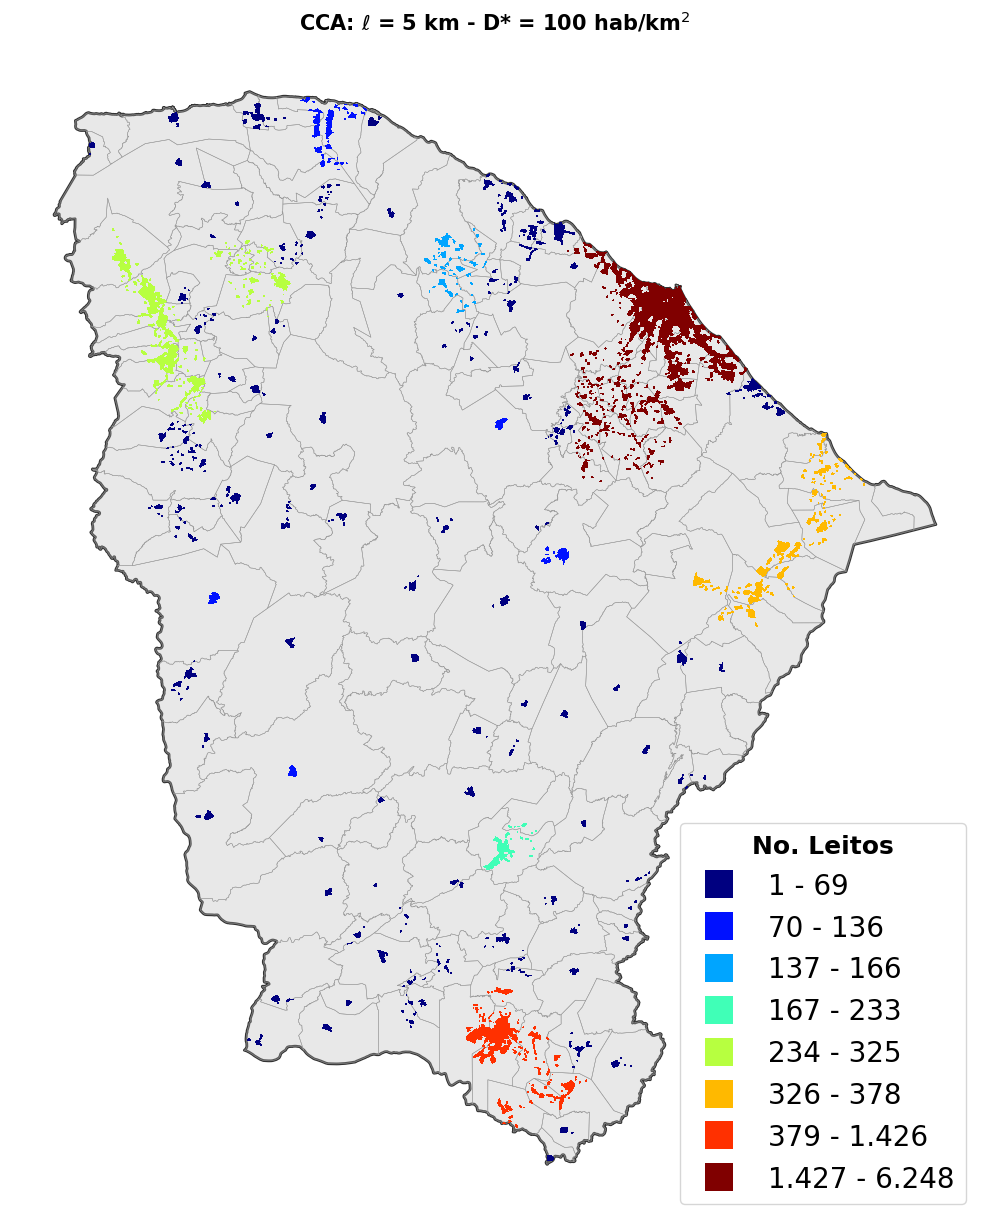

In [72]:
def transf_label(index, label):
    label = label.replace("[", "").replace("]", "").replace("(", "")
    label = [ n.strip() for n in label.split(",") ]
    if len(label)==1:
        return label[0]
    if index==0:
        label[0] = int(label[0])
    else:
        label[0] = int(label[0])+1
    label[1] = int(label[1])
    return f'{label[0]:,} - {label[1]:,}'.replace(",",".")

# -- geometry ceará
fig_mapa, (ax) = plt.subplots(1, figsize=(10,14))

setor_leitos_df[pd.notna(setor_leitos_df["NUMLEITOS"])].plot(ax=ax, zorder=3, column=f"NUMLEITOS", edgecolor="none", 
             legend=True,
             scheme="NaturalBreaks",
             k=8,
             cmap='jet',
             antialiased=False,
             linewidth=0,
             legend_kwds={
                 'loc': 4,
                 'prop': {'size':18},
                 'markerscale': 1.6,
                 "fmt": "{:.0f}",
                 "interval": True
             },
             missing_kwds={
                 "color": "#b3b3b3",
                 "edgecolor": "none",
                 "hatch": "",
                 "label": '',
                 'alpha': 0.3
             })
ce_geodata_df.plot(ax=ax, zorder=2, color='#b3b3b3', alpha=0.3, edgecolor="none", linewidth=0.2)
ce_geodata_df.plot(ax=ax, zorder=2, color='none', alpha=1.0, edgecolor="#999999", linewidth=0.35)
ce_border.plot(ax=ax, color='none', edgecolor="#333333", linewidth=2)

ax.axis('off')

for axis in [ax]:
    axis.axis('off')
    leg = axis.get_legend()
    lines = leg.get_lines()
    for line in lines:
        cur_color = line.get_markerfacecolor() 
        line.set_marker('s')
        line.set_markersize(20)
    current_labels = [t.get_text() for t in leg.get_texts()]
    new_labels =  [ transf_label(index, label) for index, label in enumerate(current_labels) ]
    axis.legend(lines, new_labels, prop={'size': 20}, loc=4, title=f'No. Leitos', bbox_to_anchor=(1.0,0.0), title_fontproperties={'weight': 'bold', 'size': 18})

#macro_df = geodata_df.drop_duplicates("MACRO_ID", keep='first')[["MACRO_ID", "MACRO_COLOR", "MACRO_NOME", "geometry_macro"]]
#macro_df = macro_df.set_geometry("geometry_macro")
#macro_df.plot(ax=ax, color="none", edgecolor="#1a1a1a", linewidth=1.4)
#new_macro_geometry.plot(ax=AX1, color="none", zorder=3, edgecolor="#1a1a1a", linewidth=1.4)
ax.set_title(fr'CCA: $\ell$ = 5 km - D* = 100 hab'+fr'/km$^2$', fontsize=15, weight='bold')
fig_mapa.tight_layout()
#fig_mapa.savefig(basepath.joinpath("redes_aih", "doc_final", f"cca_pop_l5_D100_original.png"), dpi=250, bbox_inches='tight')
fig_mapa.savefig(basepath.joinpath("redes_aih", "doc_final", f"leitos_por_CCA_ce_2022.png"), dpi=200, bbox_inches='tight')

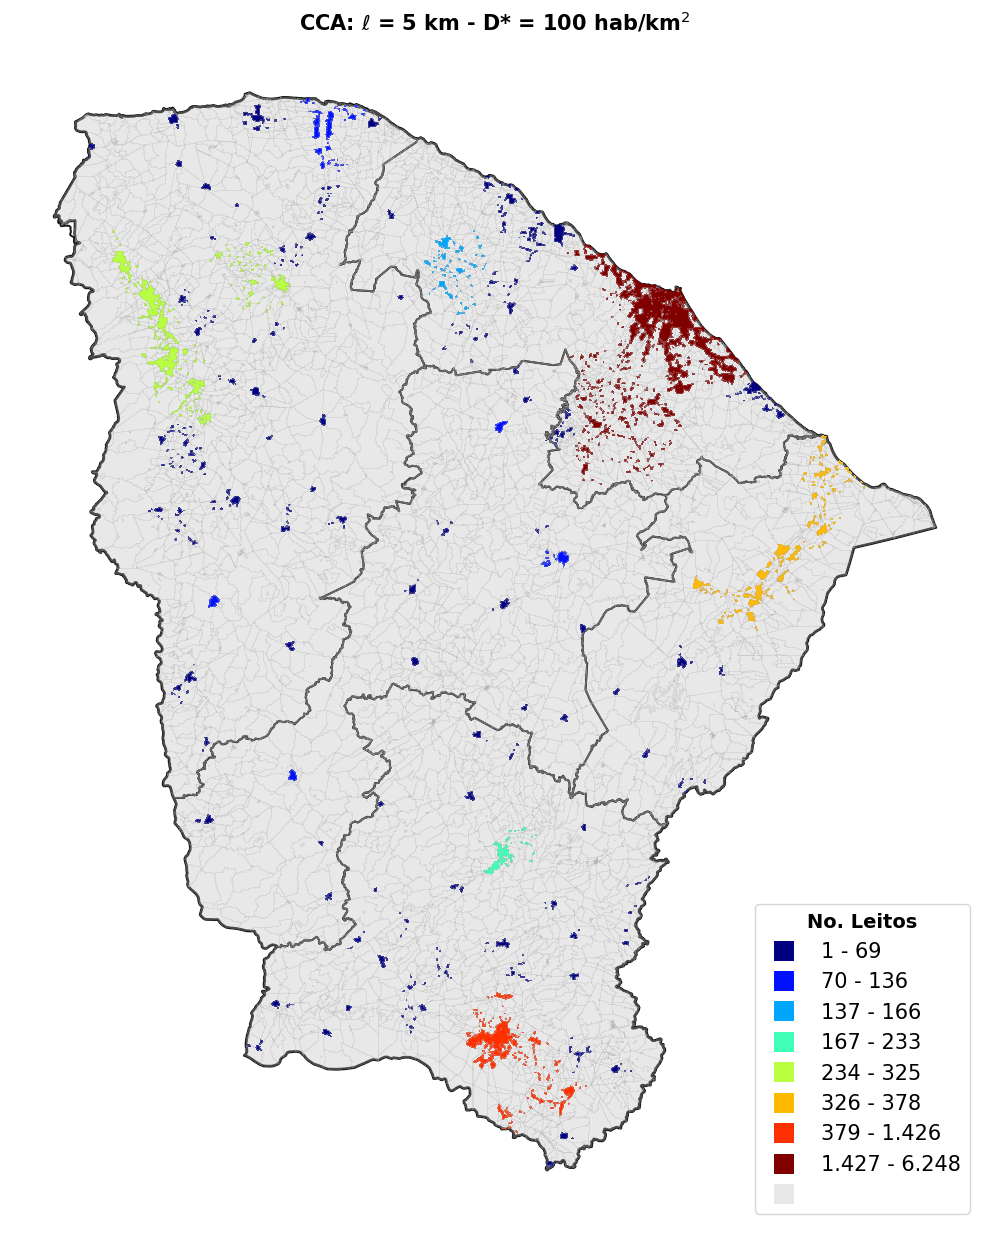

In [29]:
def transf_label(index, label):
    label = label.replace("[", "").replace("]", "").replace("(", "")
    label = [ n.strip() for n in label.split(",") ]
    if len(label)==1:
        return label[0]
    if index==0:
        label[0] = int(label[0])
    else:
        label[0] = int(label[0])+1
    label[1] = int(label[1])
    return f'{label[0]:,} - {label[1]:,}'.replace(",",".")

# -- geometry ceará
fig_mapa, (ax) = plt.subplots(1, figsize=(10,14))

setor_leitos_df.plot(ax=ax, zorder=2, column=f"NUMLEITOS", edgecolor="none", 
             legend=True,
             scheme="NaturalBreaks",
             k=8,
             cmap='jet',
             antialiased=False,
             linewidth=0,
             legend_kwds={
                 'loc': 4,
                 'prop': {'size':18},
                 'markerscale': 1.6,
                 "fmt": "{:.0f}",
                 "interval": True
             },
             missing_kwds={
                 "color": "#b3b3b3",
                 "edgecolor": "none",
                 "hatch": "",
                 "label": '',
                 'alpha': 0.3
             })
ce_border.plot(ax=ax, color='none', edgecolor="#333333", linewidth=2)

ax.axis('off')

for axis in [ax]:
    axis.axis('off')
    leg = axis.get_legend()
    lines = leg.get_lines()
    for line in lines:
        cur_color = line.get_markerfacecolor() 
        line.set_marker('s')
        line.set_markersize(14)
    current_labels = [t.get_text() for t in leg.get_texts()]
    new_labels =  [ transf_label(index, label) for index, label in enumerate(current_labels) ]
    axis.legend(lines, new_labels, prop={'size': 15}, loc=4, title=f'No. Leitos', bbox_to_anchor=(1.0,0.0), title_fontproperties={'weight': 'bold', 'size': 14})

macro_df = geodata_df.drop_duplicates("MACRO_ID", keep='first')[["MACRO_ID", "MACRO_COLOR", "MACRO_NOME", "geometry_macro"]]
macro_df = macro_df.set_geometry("geometry_macro")
macro_df.plot(ax=ax, color="none", edgecolor="#1a1a1a", linewidth=1.4)
#new_macro_geometry.plot(ax=AX1, color="none", zorder=3, edgecolor="#1a1a1a", linewidth=1.4)
ax.set_title(fr'CCA: $\ell$ = 5 km - D* = 100 hab'+fr'/km$^2$', fontsize=15, weight='bold')
fig_mapa.tight_layout()
#fig_mapa.savefig(basepath.joinpath("redes_aih", "doc_final", f"cca_pop_l5_D100_original.png"), dpi=250, bbox_inches='tight')
fig_mapa.savefig(basepath.joinpath("redes_aih", "doc_final", f"leitos_por_CCA_ce_2022_macro.png"), dpi=200, bbox_inches='tight')

C:\Users\Higor Monteiro\AppData\Local\Temp\ipykernel_25268\1360875792.py:59: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = sub_df["geometry"].centroid


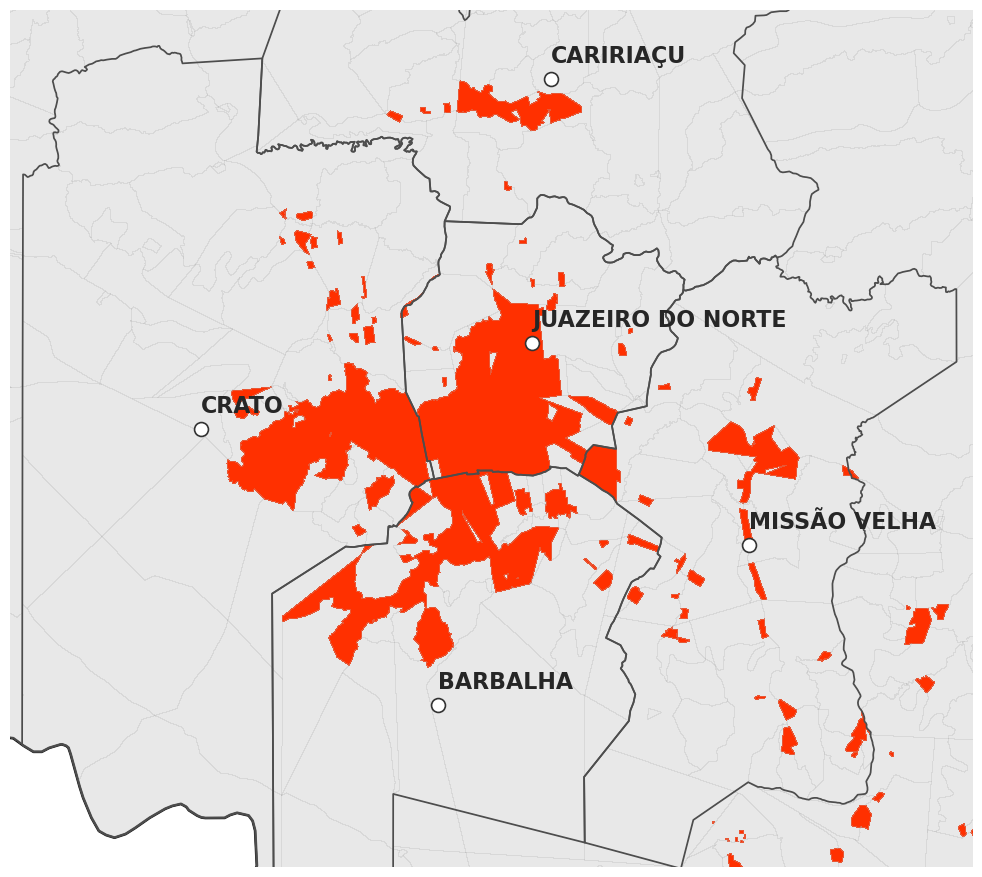

In [80]:
def transf_label(index, label):
    label = label.replace("[", "").replace("]", "").replace("(", "")
    label = [ n.strip() for n in label.split(",") ]
    if len(label)==1:
        return label[0]
    if index==0:
        label[0] = int(label[0])
    else:
        label[0] = int(label[0])+1
    label[1] = int(label[1])
    return f'{label[0]:,} - {label[1]:,}'.replace(",",".")

# -- geometry ceará
fig_mapa, (ax) = plt.subplots(1, figsize=(10,14))

setor_leitos_df.plot(ax=ax, zorder=4, column=f"NUMLEITOS", edgecolor="none", 
             legend=False,
             scheme="NaturalBreaks",
             k=8,
             cmap='jet',
             antialiased=False,
             linewidth=0,
             legend_kwds={
                 'loc': 4,
                 'prop': {'size':18},
                 'markerscale': 1.6,
                 "fmt": "{:.0f}",
                 "interval": True
             },
             missing_kwds={
                 "color": "#b3b3b3",
                 "edgecolor": "none",
                 "hatch": "",
                 "label": '',
                 'alpha': 0.3
             })
ce_border.plot(ax=ax, color='none', edgecolor="#333333", linewidth=2)

ax.axis('off')

#for axis in [ax]:
#    axis.axis('off')
#    leg = axis.get_legend()
#    lines = leg.get_lines()
#    for line in lines:
#        cur_color = line.get_markerfacecolor() 
#        line.set_marker('s')
#        line.set_markersize(14)
#    current_labels = [t.get_text() for t in leg.get_texts()]
#    new_labels =  [ transf_label(index, label) for index, label in enumerate(current_labels) ]
#    axis.legend(lines, new_labels, prop={'size': 15}, loc=4, title=f'No. Leitos', bbox_to_anchor=(1.0,0.0), title_fontproperties={'weight': 'bold', 'size': 14})

macro_df = geodata_df.drop_duplicates("MACRO_ID", keep='first')[["MACRO_ID", "MACRO_COLOR", "MACRO_NOME", "geometry_macro"]]
macro_df = macro_df.set_geometry("geometry_macro")
macro_df.plot(ax=ax, color="none", edgecolor="#1a1a1a", linewidth=1.4)

mun_list = ["BARBALHA", "CRATO", "JUAZEIRO DO NORTE", "MISSÃO VELHA", "CARIRIAÇU"]
sub_df = ce_geodata_df[ce_geodata_df["NM_MUN"].isin(mun_list)]
centroids = sub_df["geometry"].centroid
centroids.plot(ax=ax, facecolor="white", edgecolor="#333333", linewidth=1.2, markersize=100, zorder=4)
sub_df.plot(ax=ax, facecolor="none", edgecolor="#4d4d4d", linewidth=1.25, markersize=100, zorder=4)

for index, point in enumerate(centroids.values):
    label = sub_df["NM_MUN"].iat[index]
    ax.annotate(label, xy=(point.x*1.00, point.y+0.01), fontsize=16, color="#262626", weight="bold", zorder=4)

ax.set_xlim([-39.607523, -39.015448])
ax.set_ylim([-7.502643, -6.979548])

#new_macro_geometry.plot(ax=AX1, color="none", zorder=3, edgecolor="#1a1a1a", linewidth=1.4)
#ax.set_title(fr'CCA: $\ell$ = 5 km - D* = 100 hab'+fr'/km$^2$', fontsize=15, weight='bold')
fig_mapa.tight_layout()
#fig_mapa.savefig(basepath.joinpath("redes_aih", "doc_final", f"cca_pop_l5_D100_original.png"), dpi=250, bbox_inches='tight')
fig_mapa.savefig(basepath.joinpath("redes_aih", "doc_final", f"leitos_por_CCA_crato.png"), dpi=200, bbox_inches='tight')